# Conan Interaction Type

Restriant: if (pair in interact_pair_dict and inter_action_lifetime >= 0.5):

In [1]:
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [2]:
traj_notess = [['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3'],['5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3'],['5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3'],['5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3'],['5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3'],['5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3'],['5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3'],['5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3'],['4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3'],['4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3'],['4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3'],['4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3'],['4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7'],['4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5'],['4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5'],['4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']]

In [57]:
def gather_replicates(traj_notes):
    pearson_avg = []
    for traj_note in traj_notes:
        data = pd.read_csv('/media/scottzhuang/data/MD/md_ensemble/' + traj_note + '/aggregate/interaction_types.dat',sep='\s+',header=None)
        data.columns = ['residue1','residue2','interaction_type']
        pearson_avg.append(data['interaction_type'].values)
    data['interaction_type'] = np.max(pearson_avg,axis=0)
    return data

In [58]:
def plot_hydrophobic_interaction(data,ax,note):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 1].reset_index()
    data2 = data2[data2['interaction_type'] == 1].reset_index()
    data3 = data3[data3['interaction_type'] == 1].reset_index()
    data4 = data4[data4['interaction_type'] == 1].reset_index()
    data5 = data5[data5['interaction_type'] == 1].reset_index()
    #Plot Hydrophobic
    
    data_intra = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    #data_intra[data_intra['interaction_type'] == 0]['interaction_type_scale'] = (data_intra['interaction_type'] ==  )
    #data_intra['interaction_type'] = np.max([data1.interaction_type,data2.interaction_type,data3.interaction_type,data4.interaction_type,data5.interaction_type],axis=0)
    #data_intra = data_intra[(data_intra.interaction_type != 0)]
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.interaction,colormap='Oranges',ax=ax,colorbar=False)
    data_intra.to_csv('conan_interaction/' + note + '_intra_hydrophobic.csv')

In [59]:
def plot_hbond_interaction(data,ax,note):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 2].reset_index()
    data2 = data2[data2['interaction_type'] == 2].reset_index()
    data3 = data3[data3['interaction_type'] == 2].reset_index()
    data4 = data4[data4['interaction_type'] == 2].reset_index()
    data5 = data5[data5['interaction_type'] == 2].reset_index()
    #Plot Hydrophobic
    data_intra = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    #data_intra[data_intra['interaction_type'] == 0]['interaction_type_scale'] = (data_intra['interaction_type'] ==  )
    #data_intra['interaction_type'] = np.max([data1.interaction_type,data2.interaction_type,data3.interaction_type,data4.interaction_type,data5.interaction_type],axis=0)
    #data_intra = data_intra[(data_intra.interaction_type != 0)]
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.interaction,colormap='Greens',ax=ax,colorbar=False)
    data_intra.to_csv('conan_interaction/' + note + '_intra_hbond.csv')

In [60]:
def plot_salt_bridge_interaction(data,ax,note):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 3].reset_index()
    data2 = data2[data2['interaction_type'] == 3].reset_index()
    data3 = data3[data3['interaction_type'] == 3].reset_index()
    data4 = data4[data4['interaction_type'] == 3].reset_index()
    data5 = data5[data5['interaction_type'] == 3].reset_index()
    #Plot Hydrophobic
    data_intra = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    #data_intra[data_intra['interaction_type'] == 0]['interaction_type_scale'] = (data_intra['interaction_type'] ==  )
    #data_intra['interaction_type'] = np.max([data1.interaction_type,data2.interaction_type,data3.interaction_type,data4.interaction_type,data5.interaction_type],axis=0)
    #data_intra = data_intra[(data_intra.interaction_type != 0)]
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.interaction,colormap='Blues',ax=ax,colorbar=False)
    data_intra.to_csv('conan_interaction/' + note + '_intra_salt.csv')

In [63]:
def plot_intra_interaction_data(data,note):
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,3,1,aspect='equal') 
    ax2 = fig.add_subplot(1,3,2,aspect='equal') 
    ax3 = fig.add_subplot(1,3,3,aspect='equal') 
    plt1 = plot_hydrophobic_interaction(data,ax1,note)
    plt2 = plot_hbond_interaction(data,ax2,note)
    plt3 = plot_salt_bridge_interaction(data,ax3,note)

    ax1.set_xlim(150,315)
    ax1.set_ylim(150,315)
    ax2.set_xlim(150,315)
    ax2.set_ylim(150,315)    
    ax3.set_xlim(150,315)
    ax3.set_ylim(150,315)
    ax1.set_title('Hydrophobic Interaction')
    ax2.set_title('H-bond Interaction')
    ax3.set_title('Salt bridge Interaction')

    plt.suptitle(note + ' Intra-Subunit Interaction')
    plt.tight_layout()
    plt.savefig('pearson_plots/' + note + '_intra_interaction.pdf')
    plt.show()


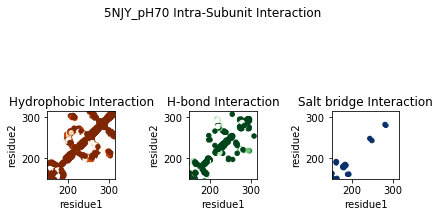

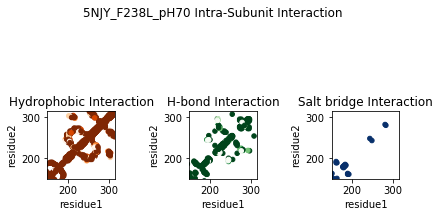

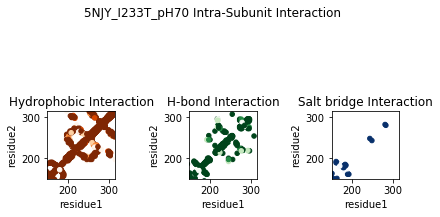

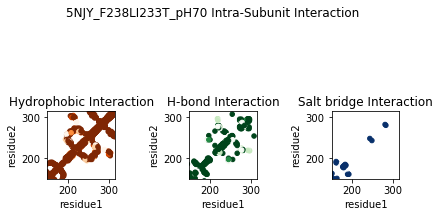

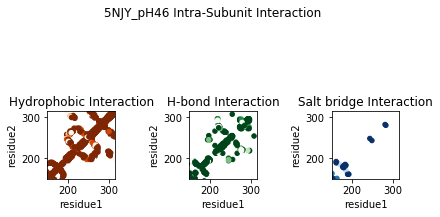

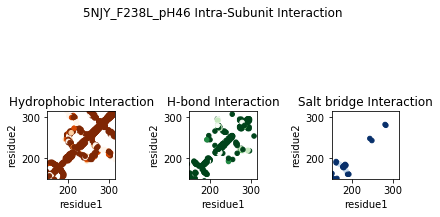

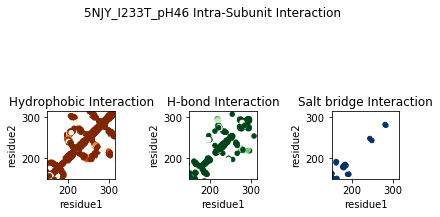

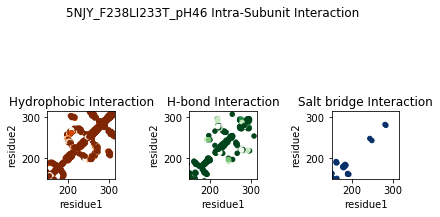

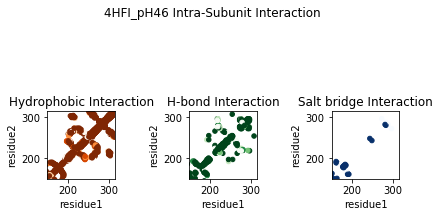

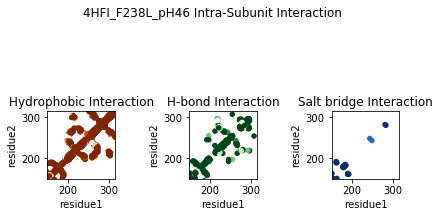

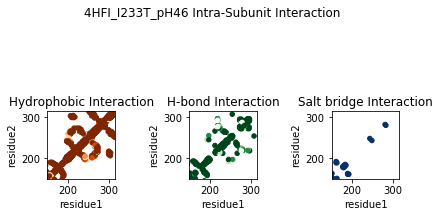

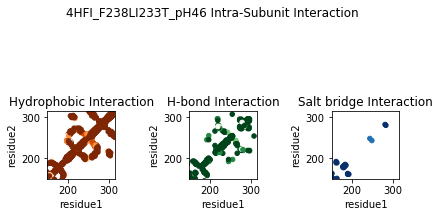

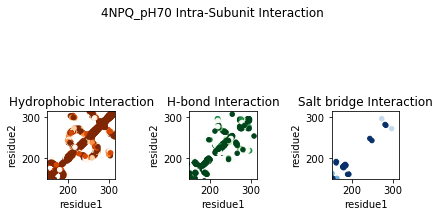

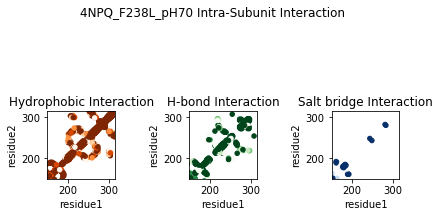

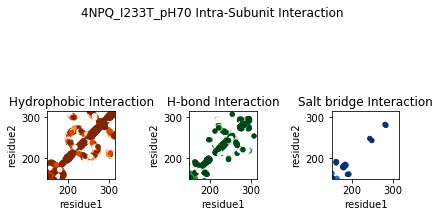

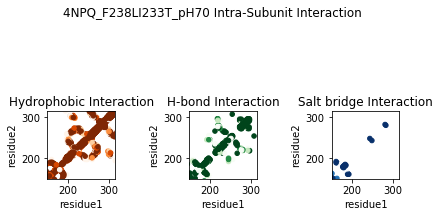

In [64]:
for traj_notes in traj_notess:
    plot_intra_interaction_data(gather_replicates(traj_notes),traj_notes[0][:-4])

In [70]:
def plot_inter_interaction_data(data,note):

    fig = plt.figure() 
    ax1 = fig.add_subplot(1,3,1,aspect='equal') 
    ax2 = fig.add_subplot(1,3,2,aspect='equal') 
    ax3 = fig.add_subplot(1,3,3,aspect='equal') 
    plt1 = plot_inter_hydrophobic_interaction(data,ax1,note)
    plt2 = plot_inter_hbond_interaction(data,ax2,note)
    plt3 = plot_inter_salt_bridge_interaction(data,ax3,note)

    ax1.set_xlim(150,315)
    ax1.set_ylim(150,315)
    ax2.set_xlim(150,315)
    ax2.set_ylim(150,315)    
    ax3.set_xlim(150,315)
    ax3.set_ylim(150,315)
    ax1.set_title('Hydrophobic Interaction')
    ax2.set_title('H-bond Interaction')
    ax3.set_title('Salt bridge Interaction')

    plt.suptitle(note + ' Inter-Subunit Interaction')
    plt.tight_layout()
    plt.savefig('pearson_plots/' + note + '_inter_interaction.pdf')
    plt.show()


In [66]:
def plot_inter_hydrophobic_interaction(data,ax,note):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 1].reset_index()
    data2 = data2[data2['interaction_type'] == 1].reset_index()
    data3 = data3[data3['interaction_type'] == 1].reset_index()
    data4 = data4[data4['interaction_type'] == 1].reset_index()
    data5 = data5[data5['interaction_type'] == 1].reset_index()
    #Plot Hydrophobic
    data_inter = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]-311) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c=data_inter.interaction,colormap='Oranges',ax=ax,colorbar=False)
    data_inter.to_csv('conan_interaction/' + note + '_inter_hydrophobic.csv')

In [67]:
def plot_inter_hbond_interaction(data,ax,note):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    print(data1[(data1.residue1 == 207) & (data1.residue2 == (228 + 311))])
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 2].reset_index()
    data2 = data2[data2['interaction_type'] == 2].reset_index()
    data3 = data3[data3['interaction_type'] == 2].reset_index()
    data4 = data4[data4['interaction_type'] == 2].reset_index()
    data5 = data5[data5['interaction_type'] == 2].reset_index()
    #Plot Hydrophobic
    data_inter = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]-311) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c=data_inter.interaction,colormap='Greens',ax=ax,colorbar=False)
    data_inter.to_csv('conan_interaction/' + note + '_inter_hbond.csv')

In [68]:
def plot_inter_salt_bridge_interaction(data,ax,note):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['interaction_type'] == 3].reset_index()
    data2 = data2[data2['interaction_type'] == 3].reset_index()
    data3 = data3[data3['interaction_type'] == 3].reset_index()
    data4 = data4[data4['interaction_type'] == 3].reset_index()
    data5 = data5[data5['interaction_type'] == 3].reset_index()
    #Plot Hydrophobic
    data_inter = pd.DataFrame(columns=['residue1','residue2','interaction'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5]).drop(['index','interaction_type'],axis=1).values]))):
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 4,int(pair[1]-311) + 4,
                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])].shape[0],
                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])].shape[0],
                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])].shape[0],
                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])].shape[0],
                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])].shape[0]])]],
                                                        columns=['residue1','residue2','interaction']
                                  )],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c=data_inter.interaction,colormap='Greens',ax=ax,colorbar=False)
    data_inter.to_csv('conan_interaction/' + note + '_inter_salt.csv')

In [ ]:
for traj_notes in traj_notess:
    plot_inter_interaction_data(gather_replicates(traj_notes),traj_notes[0][:-4])

# Plot Difference

inter/intra_hbond/hydrophobic

In [3]:
def plot_interaction_difference(note1,note2,note3):
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    #ax3 = fig.add_subplot(1,3,3) 
    plot_inter_interaction_difference(note1,note2,note3,ax1)
    plot_intra_interaction_difference(note1,note2,note3,ax2)
    #plt3 = plot_salt_bridge_interaction(data,ax3)

    ax1.set_xlim(150,315)
    ax1.set_ylim(150,315)
    ax2.set_xlim(150,315)
    ax2.set_ylim(150,315)    
    ax1.set_title('inter interaction')
    ax2.set_title('intra interaction')
    plt.suptitle(note1 + ' vs ' + note2 + ' of ' + note3)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_inter_interaction_difference(note1,note2,note3,ax):
    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_inter_' + note3 + '.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_inter_' + note3 +'.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['interaction'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['interaction'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) >= 0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) <= -0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'interaction'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['interaction'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) >= 0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) <= -0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.interaction,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


In [5]:
def plot_intra_interaction_difference(note1,note2,note3,ax):
    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_intra_' + note3 + '.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_intra_' + note3 +'.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['interaction'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['interaction'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) >= 0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) <= -0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'interaction'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['interaction'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) >= 0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'interaction'].values) <= -0.6) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.interaction,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


Orange note1

Purple note2

intra: 4NPQ_pH70 of [202 238]
intra: 4NPQ_pH70 of [238 202]
intra: 4NPQ_pH70 of [202 238]
intra: 4NPQ_pH70 of [238 202]


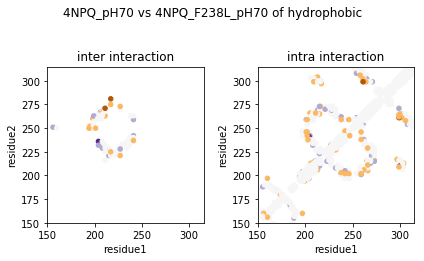

In [6]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238L_pH70','hydrophobic')

inter: 4NPQ_I233T_pH70 of [207 232]
inter: 4NPQ_pH70 of [237 233]
inter: 4NPQ_pH70 of [233 233]
inter: 4NPQ_pH70 of [234 233]
intra: 4NPQ_pH70 of [233 228]
intra: 4NPQ_pH70 of [228 233]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [233 234]
intra: 4NPQ_pH70 of [233 236]
intra: 4NPQ_pH70 of [238 233]
intra: 4NPQ_pH70 of [237 233]
intra: 4NPQ_pH70 of [233 232]
intra: 4NPQ_pH70 of [236 233]
intra: 4NPQ_pH70 of [229 233]
intra: 4NPQ_pH70 of [232 233]
intra: 4NPQ_pH70 of [234 233]
intra: 4NPQ_pH70 of [233 229]
intra: 4NPQ_pH70 of [233 238]


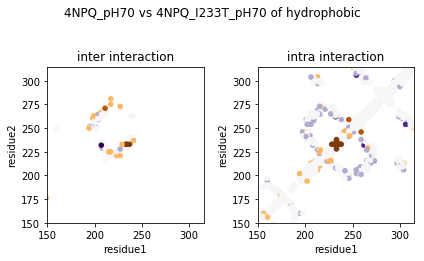

In [7]:
plot_interaction_difference('4NPQ_pH70','4NPQ_I233T_pH70','hydrophobic')

inter: 4NPQ_F238LI233T_pH70 of [204 236]
inter: 4NPQ_pH70 of [198 260]
inter: 4NPQ_pH70 of [237 233]
inter: 4NPQ_pH70 of [233 233]
inter: 4NPQ_pH70 of [198 260]
inter: 4NPQ_pH70 of [234 233]
intra: 4NPQ_pH70 of [202 238]
intra: 4NPQ_pH70 of [233 228]
intra: 4NPQ_pH70 of [228 233]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [233 234]
intra: 4NPQ_pH70 of [233 236]
intra: 4NPQ_pH70 of [238 233]
intra: 4NPQ_pH70 of [237 233]
intra: 4NPQ_pH70 of [238 202]
intra: 4NPQ_pH70 of [233 232]
intra: 4NPQ_pH70 of [236 233]
intra: 4NPQ_pH70 of [229 233]
intra: 4NPQ_pH70 of [232 233]
intra: 4NPQ_pH70 of [234 233]
intra: 4NPQ_pH70 of [233 229]
intra: 4NPQ_pH70 of [233 238]


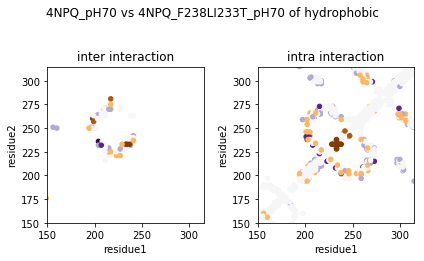

In [8]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238LI233T_pH70','hydrophobic')

inter: 4HFI_F238L_pH46 of [237 233]
inter: 4HFI_F238L_pH46 of [241 263]
inter: 4HFI_F238L_pH46 of [198 260]
inter: 4HFI_F238L_pH46 of [241 236]
inter: 4HFI_F238L_pH46 of [237 237]
inter: 4HFI_F238L_pH46 of [207 232]
inter: 4HFI_F238L_pH46 of [234 229]
inter: 4HFI_F238L_pH46 of [240 240]
inter: 4HFI_F238L_pH46 of [234 229]
inter: 4HFI_F238L_pH46 of [240 240]
inter: 4HFI_F238L_pH46 of [237 233]
inter: 4HFI_F238L_pH46 of [198 260]
inter: 4HFI_pH46 of [234 263]
inter: 4HFI_pH46 of [227 228]
inter: 4HFI_F238L_pH46 of [237 237]
inter: 4HFI_pH46 of [201 240]
inter: 4HFI_F238L_pH46 of [207 232]
intra: 4HFI_F238L_pH46 of [259 246]
intra: 4HFI_pH46 of [237 242]
intra: 4HFI_pH46 of [242 237]
intra: 4HFI_pH46 of [259 238]
intra: 4HFI_pH46 of [238 259]
intra: 4HFI_F238L_pH46 of [246 259]
intra: 4HFI_pH46 of [237 242]
intra: 4HFI_pH46 of [242 237]
intra: 4HFI_pH46 of [259 238]
intra: 4HFI_pH46 of [238 259]


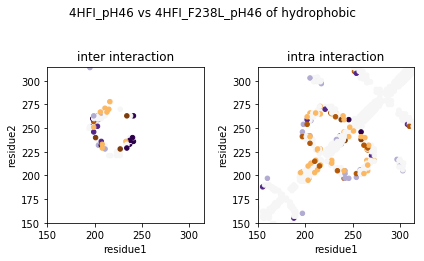

In [9]:
plot_interaction_difference('4HFI_pH46','4HFI_F238L_pH46','hydrophobic')

inter: 4HFI_I233T_pH46 of [205 263]
inter: 4HFI_pH46 of [233 233]
inter: 4HFI_pH46 of [233 236]
inter: 4HFI_pH46 of [234 233]
intra: 4HFI_I233T_pH46 of [221 270]
intra: 4HFI_I233T_pH46 of [270 221]
intra: 4HFI_pH46 of [233 228]
intra: 4HFI_pH46 of [228 233]
intra: 4HFI_pH46 of [233 237]
intra: 4HFI_pH46 of [233 234]
intra: 4HFI_pH46 of [233 236]
intra: 4HFI_pH46 of [238 233]
intra: 4HFI_pH46 of [237 233]
intra: 4HFI_pH46 of [252 310]
intra: 4HFI_I233T_pH46 of [221 270]
intra: 4HFI_pH46 of [233 232]
intra: 4HFI_pH46 of [236 233]
intra: 4HFI_I233T_pH46 of [270 221]
intra: 4HFI_pH46 of [229 233]
intra: 4HFI_pH46 of [310 252]
intra: 4HFI_pH46 of [232 233]
intra: 4HFI_pH46 of [234 233]
intra: 4HFI_pH46 of [233 229]
intra: 4HFI_pH46 of [233 238]


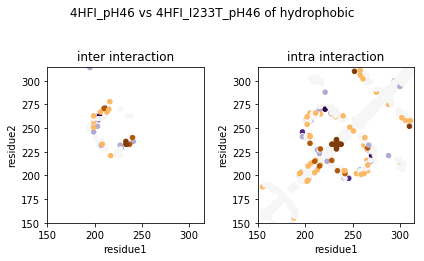

In [10]:
plot_interaction_difference('4HFI_pH46','4HFI_I233T_pH46','hydrophobic')

inter: 4HFI_pH46 of [199 257]
inter: 4HFI_F238LI233T_pH46 of [241 236]
inter: 4HFI_F238LI233T_pH46 of [237 237]
inter: 4HFI_F238LI233T_pH46 of [240 240]
inter: 4HFI_pH46 of [201 240]
inter: 4HFI_F238LI233T_pH46 of [240 240]
inter: 4HFI_pH46 of [233 233]
inter: 4HFI_pH46 of [233 236]
inter: 4HFI_pH46 of [234 233]
inter: 4HFI_F238LI233T_pH46 of [237 237]
inter: 4HFI_pH46 of [201 240]
inter: 4HFI_pH46 of [199 257]
intra: 4HFI_F238LI233T_pH46 of [259 246]
intra: 4HFI_F238LI233T_pH46 of [246 259]
intra: 4HFI_pH46 of [233 228]
intra: 4HFI_pH46 of [228 233]
intra: 4HFI_pH46 of [233 237]
intra: 4HFI_pH46 of [233 234]
intra: 4HFI_pH46 of [233 236]
intra: 4HFI_pH46 of [238 233]
intra: 4HFI_pH46 of [237 233]
intra: 4HFI_pH46 of [252 310]
intra: 4HFI_pH46 of [233 232]
intra: 4HFI_pH46 of [236 233]
intra: 4HFI_pH46 of [229 233]
intra: 4HFI_pH46 of [310 252]
intra: 4HFI_pH46 of [232 233]
intra: 4HFI_pH46 of [234 233]
intra: 4HFI_pH46 of [233 229]
intra: 4HFI_pH46 of [233 238]


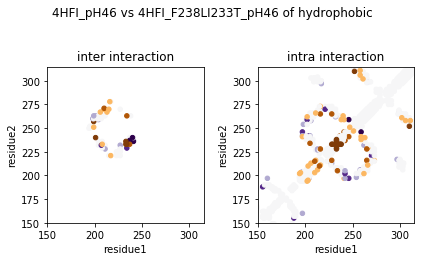

In [11]:
plot_interaction_difference('4HFI_pH46','4HFI_F238LI233T_pH46','hydrophobic')

intra: 4NPQ_F238L_pH70 of [287 292]
intra: 4NPQ_F238L_pH70 of [292 287]
intra: 4NPQ_F238L_pH70 of [287 292]
intra: 4NPQ_F238L_pH70 of [292 287]


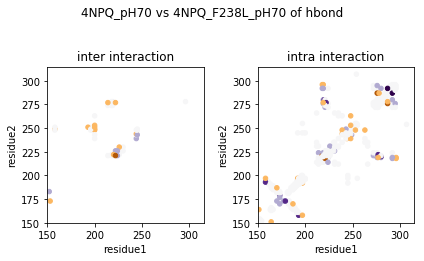

In [12]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238L_pH70','hbond')

inter: 4NPQ_I233T_pH70 of [233 233]
inter: 4NPQ_I233T_pH70 of [230 233]
intra: 4NPQ_I233T_pH70 of [191 194]
intra: 4NPQ_I233T_pH70 of [233 230]
intra: 4NPQ_I233T_pH70 of [233 235]
intra: 4NPQ_pH70 of [296 219]
intra: 4NPQ_I233T_pH70 of [235 233]
intra: 4NPQ_I233T_pH70 of [233 231]
intra: 4NPQ_pH70 of [219 296]
intra: 4NPQ_I233T_pH70 of [231 233]
intra: 4NPQ_I233T_pH70 of [194 191]
intra: 4NPQ_I233T_pH70 of [230 233]
intra: 4NPQ_I233T_pH70 of [191 194]
intra: 4NPQ_pH70 of [296 219]
intra: 4NPQ_pH70 of [219 296]
intra: 4NPQ_I233T_pH70 of [194 191]


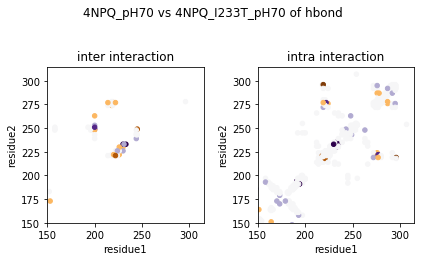

In [13]:
plot_interaction_difference('4NPQ_pH70','4NPQ_I233T_pH70','hbond')

inter: 4NPQ_F238LI233T_pH70 of [233 233]
inter: 4NPQ_F238LI233T_pH70 of [230 226]
inter: 4NPQ_F238LI233T_pH70 of [230 233]
inter: 4NPQ_F238LI233T_pH70 of [231 233]
inter: 4NPQ_F238LI233T_pH70 of [230 226]
intra: 4NPQ_F238LI233T_pH70 of [233 230]
intra: 4NPQ_F238LI233T_pH70 of [233 235]
intra: 4NPQ_F238LI233T_pH70 of [235 233]
intra: 4NPQ_F238LI233T_pH70 of [233 231]
intra: 4NPQ_F238LI233T_pH70 of [231 233]
intra: 4NPQ_F238LI233T_pH70 of [287 292]
intra: 4NPQ_F238LI233T_pH70 of [292 287]
intra: 4NPQ_F238LI233T_pH70 of [230 233]
intra: 4NPQ_F238LI233T_pH70 of [287 292]
intra: 4NPQ_F238LI233T_pH70 of [292 287]


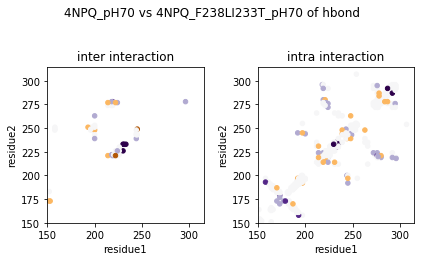

In [14]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238LI233T_pH70','hbond')

inter: 4HFI_F238L_pH46 of [244 244]
intra: 4HFI_F238L_pH46 of [224 276]
intra: 4HFI_F238L_pH46 of [276 224]
intra: 4HFI_F238L_pH46 of [245 192]
intra: 4HFI_F238L_pH46 of [263 243]
intra: 4HFI_F238L_pH46 of [243 263]
intra: 4HFI_F238L_pH46 of [192 245]
intra: 4HFI_F238L_pH46 of [224 276]
intra: 4HFI_F238L_pH46 of [276 224]
intra: 4HFI_F238L_pH46 of [245 192]
intra: 4HFI_F238L_pH46 of [263 243]
intra: 4HFI_F238L_pH46 of [243 263]
intra: 4HFI_F238L_pH46 of [192 245]


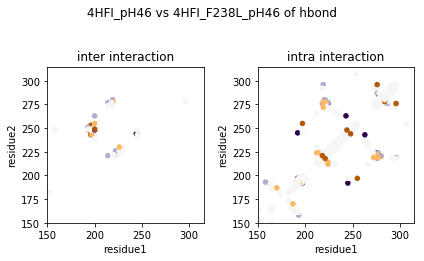

In [15]:
plot_interaction_difference('4HFI_pH46','4HFI_F238L_pH46','hbond')

inter: 4HFI_I233T_pH46 of [233 233]
inter: 4HFI_I233T_pH46 of [230 233]
inter: 4HFI_I233T_pH46 of [231 233]
intra: 4HFI_I233T_pH46 of [233 230]
intra: 4HFI_I233T_pH46 of [233 235]
intra: 4HFI_I233T_pH46 of [235 233]
intra: 4HFI_I233T_pH46 of [233 231]
intra: 4HFI_I233T_pH46 of [231 233]
intra: 4HFI_I233T_pH46 of [230 233]


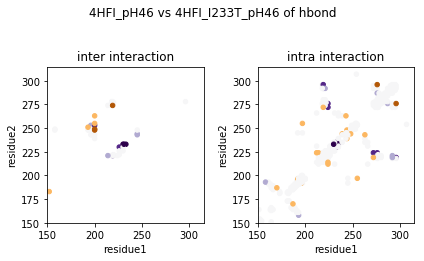

In [16]:
plot_interaction_difference('4HFI_pH46','4HFI_I233T_pH46','hbond')

inter: 4HFI_pH46 of [197 243]
inter: 4HFI_F238LI233T_pH46 of [233 233]
inter: 4HFI_F238LI233T_pH46 of [230 233]
inter: 4HFI_F238LI233T_pH46 of [231 233]
inter: 4HFI_pH46 of [197 243]
intra: 4HFI_F238LI233T_pH46 of [233 230]
intra: 4HFI_F238LI233T_pH46 of [233 235]
intra: 4HFI_F238LI233T_pH46 of [235 233]
intra: 4HFI_F238LI233T_pH46 of [233 231]
intra: 4HFI_F238LI233T_pH46 of [231 233]
intra: 4HFI_F238LI233T_pH46 of [230 233]


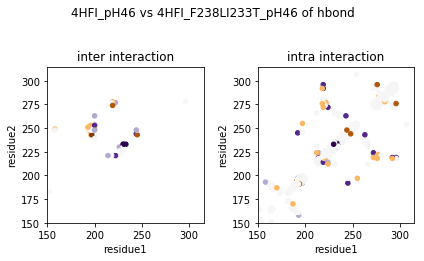

In [17]:
plot_interaction_difference('4HFI_pH46','4HFI_F238LI233T_pH46','hbond')